<h1 style="color: #EC86BB;">Kütüphanelerin ve Verilerin Yüklenmesi(Import Libraries and Data)</h1>

In [120]:
import numpy as np 
import pandas as pd 
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans

In [121]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/youtube-trending-video-dataset/MX_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/GB_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/BR_category_id.json
/kaggle/input/youtube-trending-video-dataset/FR_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/IN_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/MX_category_id.json
/kaggle/input/youtube-trending-video-dataset/GB_category_id.json
/kaggle/input/youtube-trending-video-dataset/US_category_id.json
/kaggle/input/youtube-trending-video-dataset/BR_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/RU_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/IN_category_id.json
/kaggle/input/youtube-trending-video-dataset/KR_category_id.json
/kaggle/input/youtube-trending-video-dataset/DE_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/RU_category_id.json
/kaggle/input/youtube-trend

<h1 style="color: #EC86BB;">Keşifçi Veri Analizi (Exploratory Data Analysis — EDA)  </h1>

In [122]:
us_data  = pd.read_csv("/kaggle/input/youtube-trending-video-dataset/US_youtube_trending_data.csv")
us_data.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [114]:
us_data.info()
print("*************************************************************")
us_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268787 entries, 0 to 268786
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           268787 non-null  object
 1   title              268787 non-null  object
 2   publishedAt        268787 non-null  object
 3   channelId          268787 non-null  object
 4   channelTitle       268787 non-null  object
 5   categoryId         268787 non-null  int64 
 6   trending_date      268787 non-null  object
 7   tags               268787 non-null  object
 8   view_count         268787 non-null  int64 
 9   likes              268787 non-null  int64 
 10  dislikes           268787 non-null  int64 
 11  comment_count      268787 non-null  int64 
 12  thumbnail_link     268787 non-null  object
 13  comments_disabled  268787 non-null  bool  
 14  ratings_disabled   268787 non-null  bool  
 15  description        264238 non-null  object
dtypes: bool(2), int64(5)

,categoryId,view_count,likes,dislikes,comment_count
count,268787.000000,2.687870e+05,2.687870e+05,268787.000000,2.687870e+05
mean,18.743511,2.734467e+06,1.314697e+05,1134.277495,1.014303e+04
std,6.786562,9.794087e+06,4.539469e+05,8047.291315,7.260853e+04
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,17.000000,4.725410e+05,1.796300e+04,0.000000,1.280000e+03
50%,20.000000,9.368710e+05,4.020500e+04,0.000000,2.754000e+03
75%,24.000000,2.106178e+06,9.877300e+04,467.000000,6.386000e+03
max,29.000000,1.407644e+09,1.602153e+07,879354.000000,6.738537e+06


In [123]:
category_stats = us_data.groupby('title')[['likes', 'dislikes', 'view_count']].sum()
most_popular_category = category_stats.sum(axis=1).idxmax()
most_popular_stats = category_stats.loc[most_popular_category]
print("En popüler video:", most_popular_category)
print("Toplam beğeni:", most_popular_stats['likes'])
print("Toplam beğenmeme:", most_popular_stats['dislikes'])
print("Toplam görüntülenme:", most_popular_stats['view_count'])

En popüler video: Turn into orbeez - Tutorial #Shorts
Toplam beğeni: 189617847
Toplam beğenmeme: 6167736
Toplam görüntülenme: 5640301234


In [124]:
least = us_data[us_data["comment_count"] == us_data["comment_count"].min()]
least
most_commented_video = us_data[us_data['comment_count'] == us_data['comment_count'].max()]
most_commented_video.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
56374,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-05-30T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,264407389,16021534,150989,6738537,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...


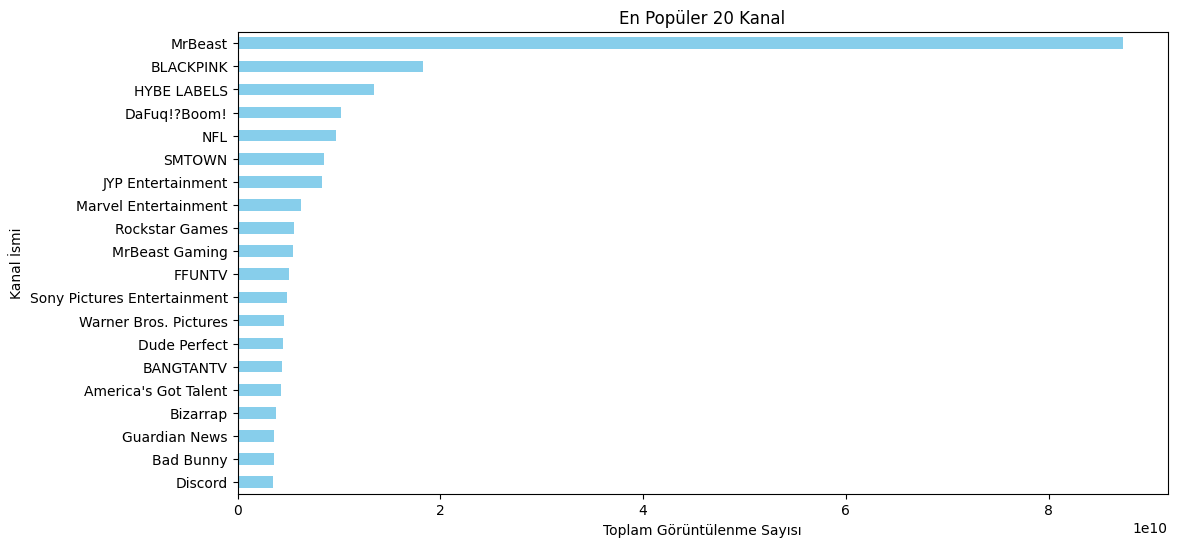

In [125]:
channel_views = us_data.groupby('channelTitle')['view_count'].sum()
channel_views = channel_views.sort_values(ascending=False)
N = 20  
top_channels = channel_views[:N]
plt.figure(figsize=(12, 6))
top_channels.plot(kind='barh', color='skyblue')
plt.xlabel('Toplam Görüntülenme Sayısı')
plt.ylabel('Kanal İsmi')
plt.title(f'En Popüler {N} Kanal')
plt.gca().invert_yaxis()  
plt.show()

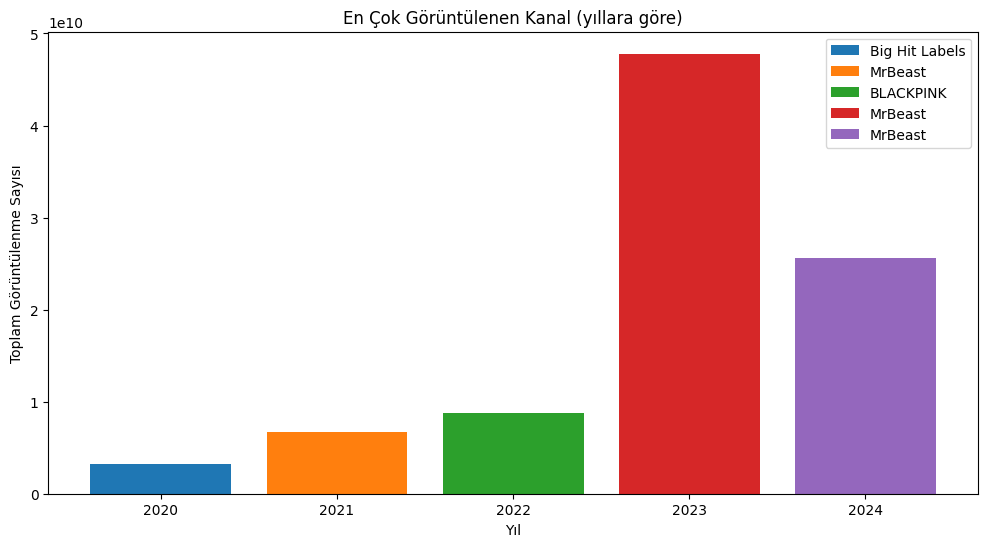

In [138]:
us_data['trending_date'] = pd.to_datetime(us_data['trending_date'], format='%y.%d.%m')
us_data['trending_year'] = us_data['trending_date'].dt.year
channel_views_by_year = us_data.groupby(['trending_year', 'channelTitle'])['view_count'].sum().reset_index()
most_viewed_channel_by_year = channel_views_by_year.loc[channel_views_by_year.groupby('trending_year')['view_count'].idxmax()]
plt.figure(figsize=(12, 6))
for year, group in most_viewed_channel_by_year.groupby('trending_year'):
    plt.bar(str(year), group['view_count'], label=group['channelTitle'].values[0])

plt.xlabel('Yıl')
plt.ylabel('Toplam Görüntülenme Sayısı')
plt.title('En Çok Görüntülenen Kanal (yıllara göre)')
plt.legend(loc='best')
plt.show()

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


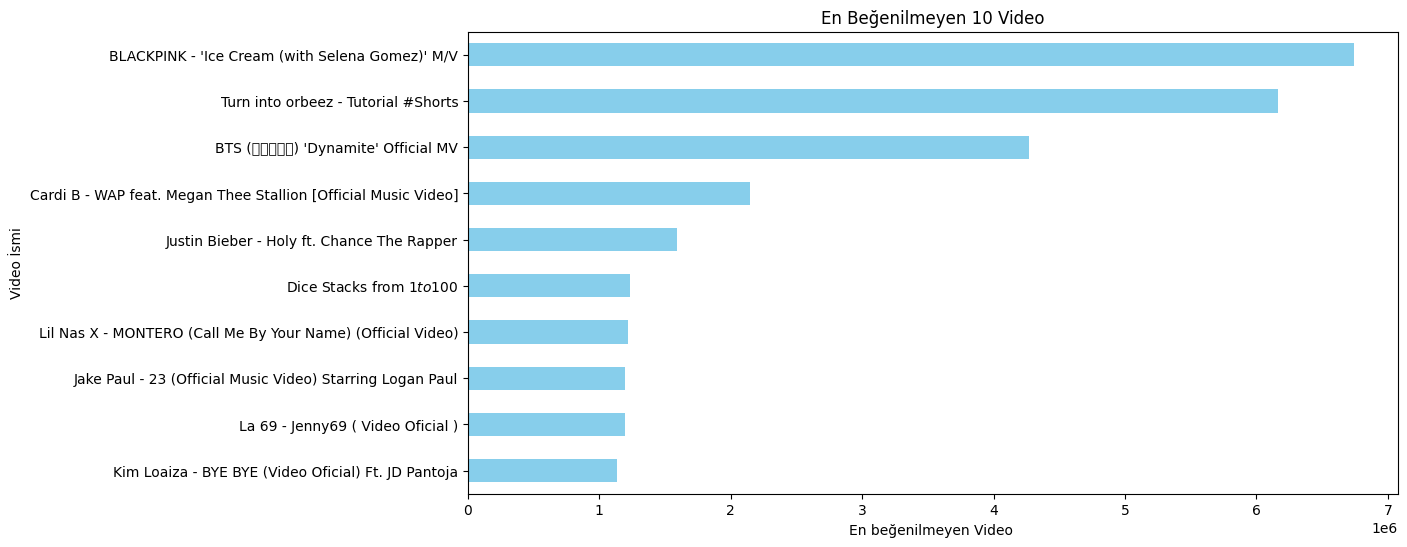

In [129]:
dislike_video = us_data.groupby('title')["dislikes"].sum()
dislike_video = dislike_video.sort_values(ascending=False)
N = 10  
top_channels = dislike_video[:N]
plt.figure(figsize=(12, 6))
top_channels.plot(kind='barh', color='skyblue')
plt.xlabel('En beğenilmeyen Video ')
plt.ylabel('Video İsmi')
plt.title(f'En Beğenilmeyen {N} Video')
plt.gca().invert_yaxis()  
plt.show()

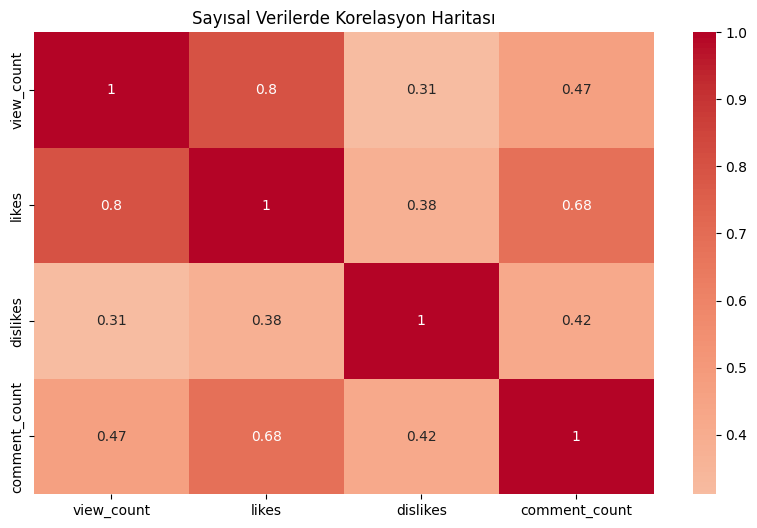

In [130]:
numerical_columns = ['view_count', 'likes', 'dislikes', 'comment_count']

correlation_matrix = us_data[numerical_columns].corr()


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Sayısal Verilerde Korelasyon Haritası')
plt.show()

<h1 style="color: #EC86BB;">Veri Ön İşleme (Data Preprocessing)  </h1>

<li style=" font-size: 25px;color : #F3B1D4">categoryID'leri ile kategori isimlerini eşlemek için kategorilerin bulunduğu json verisi okunur    </li>

In [131]:
import json
with open("../input/youtube-trending-video-dataset/US_category_id.json") as f: categoryID = json.load(f)
categoryID, l_c = categoryID['items'], len(categoryID['items'])
ID_to_Category = dict(zip([int(categoryID[i]['id']) for i in range(l_c)],
                          [categoryID[i]['snippet']['title'] for i in range(l_c)]))

In [132]:
ID_to_Category

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

<li style=" font-size: 25px;color : #F3B1D4">Kullanılmayacak video_id ve thumbnail_link verileri silinir   </li>

In [133]:
us_data.drop(columns=['video_id','thumbnail_link'],inplace=True, errors='ignore')
us_data.head(n=2)

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare..."


<li style=" font-size: 25px;color : #F3B1D4">trending_data'daki  saatler 00.00.00 olarak kaydedilmiş  saatler analiz için ayırt edici bir bilgi olamayacağı için trending_data ile publishedAt  verilerindeki saat bilgileri silinir</li>

In [136]:
#2020-08-11T19:20:14Z
def clean_trending_date(date):
    y,m,d = date.split('T')[0].split('-')
    return datetime.date(int(y), int(m), int(d))

def clean_publish_time(time):
    y,m,d = time.split('T')[0].split('-')
    return datetime.date(int(y), int(m), int(d))


In [137]:
us_data['trending_date'] = us_data['trending_date'].apply(clean_trending_date)
us_data['publishedAt'] = us_data['publishedAt'].apply(clean_publish_time)


us_data.head(n=2)

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare..."


<li style=" font-size: 25px;color : #F3B1D4">tag değişkenindeki veriler liste şeklinde sıralanır    </li>

In [ ]:
def clean_tags(tag):
    if tag == '[none]': return []
    return tag.lower().replace('"','').split('|')

us_data['tags'] = us_data['tags'].apply(clean_tags)
us_data.head(n=2)


<li style=" font-size: 25px;color : #F3B1D4">is_viral adında  kategorik değişken oluşturulur,  görüntülenme sayıları bir milyondan fazla olan verilerin viral veri olarak is_viral kategorik değişkenine ataması yapılır     </li>

In [ ]:
us_data['is_viral'] = (us_data['view_count'] > 1000000).astype(int)
us_data.head()

In [ ]:
numerical_columns = ['view_count', 'likes', 'dislikes', 'comment_count','is_viral']

correlation_matrix = us_data[numerical_columns].corr()


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Sayısal Verilerde Korelasyon Haritası')
plt.show()

<h1 style="color: #EC86BB;">Denetimli Öğrenme(Supervised Learning)  </h1>

In [ ]:
X = us_data[['likes', 'comment_count', 'view_count', 'dislikes']]
y = us_data['is_viral']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
f1 = f1_score(y_test, y_pred)
print(f"Denetimli Öğrenme (Lojistik Regresyon) Modeli F1 Skoru: {f1}")

<li style=" font-size: 25px;color : #F3B1D4">Lojistik regresyon modelinin YouTube trend video verisi üzerinde elde ettiği F1 skoru olan 0.9926, modelin oldukça başarılı bir performans gösterdiğine işaret eder. F1 skoru, precision (kesinlik) ve recall (duyarlılık) metriklerinin harmonik ortalamasını alır, bu nedenle modelin her iki metriği de yüksek seviyede optimize ettiğini gösterir.

<h1 style="color: #EC86BB;">Denetimsiz Öğrenme(Unsupervised Learning)  </h1>

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
kmeans = KMeans(n_clusters=3)  # 3 küme oluşturuyoruz
kmeans.fit(X_scaled)


In [ ]:
us_data['Cluster'] = kmeans.labels_
us_data['Cluster']

In [ ]:
plt.scatter(us_data['view_count'], us_data['likes'], c=us_data['Cluster'], cmap='viridis')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.title('YouTube Video Segmentasyonu (K-Means)')
plt.show()

<li style=" font-size: 25px;color : #F3B1D4">Bu K-means model sonucu, YouTube videolarını izlenme ve beğeni sayısına göre segmentlere ayırmakta kullanılmış. Grafikte farklı renklerdeki noktalar, K-means algoritmasının belirlediği farklı kümeleri temsil ediyor.Kümeler arasında bazı örtüşmeler (overlap) olsa da, genel olarak farklı izlenme ve beğeni seviyelerine sahip videoların iyi bir şekilde ayrıldığını söyleyebiliriz.

<h1 style="color: #EC86BB;">Modellerin Değerlendirilmesi  </h1>

<h4 style="color: #EC86BB;">Denetimli Öğrenme(Supervised Learning)  </h4>

<li style=" font-size: 25px;color : #F3B1D4">
Bu yüksek F1 skoru, modelin genel performansını çok iyi bir şekilde yansıtır. YouTube gibi büyük veri setlerinde videoların etkileşimlerini doğru bir şekilde sınıflandırabilmek, platformun öneri sistemlerinin verimliliği açısından da büyük önem taşır. Örneğin, bu modelin benzeri bir sistem YouTube'un öneri algoritmasında kullanılsa, kullanıcıların ilgi alanlarına uygun, daha doğru öneriler sunulabilir. Bununla birlikte, bu kadar yüksek bir skor elde edilmesi, verilerin oldukça iyi temizlenmiş, özellik mühendisliği uygulanmış ve dengesiz sınıf problemine karşı gerekli önlemler alınmış olduğunun bir göstergesidir.</li>
<li style=" font-size: 25px;color : #F3B1D4">Sonuç olarak, 0.9926'lık F1 skoru, modelin yüksek bir doğrulukla sınıflandırma yaptığı ve hata oranının oldukça düşük olduğunu gösterir. Bu da veri seti ve özelliklerin modele iyi bir şekilde entegre edildiğinin ve lojistik regresyon modelinin bu veri seti üzerinde etkin bir şekilde çalıştığının bir göstergesidir. </li>

<h4 style="color: #EC86BB;">Denetimsiz Öğrenme(Unsupervised Learning)  </h4>

<li style=" font-size: 25px;color : #F3B1D4">Bu K-means kümeleme analizi, YouTube videolarını beğeni ve izlenme sayılarına göre sınıflandırarak dört ana küme ortaya koymaktadır. Grafikte, kümelerin yoğunluk ve yayılım farklılıkları gözlemlenmiştir.

 <li style=" font-size: 25px;color : #F3B1D4">Örneğin, sarı ile gösterilen küme yüksek beğeni sayısı ile karakterize edilirken, daha düşük izlenme sayılarına sahip kümeler mor renkle belirtilmiştir. Dikey eksende beğeni sayısı ve yatay eksende izlenme sayısı gözetildiğinde, videolar arasında belirli bir pozitif korelasyon olduğu görülmektedir. İzlenme sayısı bir milyar üzeri olan iki video (outlier) en sağda izole halde bulunmaktadır, bu da onların aşırı popülerlik düzeyini göz önüne sermektedir.

<li style=" font-size: 25px;color : #F3B1D4"> Bu durum, K-means algoritmasının genel eğilimleri ve ekstrem durumları başarıyla ayırt edebildiğini göstermektedir. Ancak, kümeler arasında bazı örtüşmelerin varlığı, mükemmel bir ayrışma olmadığını fakat yine de genel trendleri yansıttığını ortaya koymaktadır.</li>

<div style="text-align: center;">
  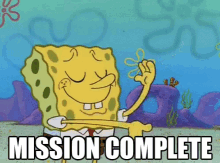
</div>
